## Establishing Test Functions and their respective Derivative and Hessian 

In [3]:
import numpy as np
import numpy.linalg as la
from numpy import linalg as LA
import matplotlib.pyplot as pt
import sympy as sym
from mpl_toolkits.mplot3d import axes3d
from numpy.linalg import inv
import matplotlib.ticker as ticker
from matplotlib.colors import LogNorm

In [4]:
#function 1
def f1(x):
    return (x[0]**2 - x[1])**2 + (x[0]-1)**2
#derivative of function 1
def df1(x):
    return np.array([4*x[0]*(x[0]**2 - x[1]) + 2*(x[0]-1),  -2*(x[0]**2 - x[1])])
#Hessian of function 1
def Hessian1(x):
    return (np.array([[4*(3*x[0]**2 - x[1]) + 2,  -4*x[0]], [-4*x[0], 2]]))
#inv of the Hessian for function 1
def inv_Hessian1(x):
    return inv(Hessian1(x))  


#function 2
def f2(x):
    return 100*(x[0]**2 - x[1])**2 + (x[0]-1)**2
#derivative of function 2
def df2(x):
    return np.array([400*x[0]*(x[0]**2 - x[1]) + 2*(x[0]-1),  -200*(x[0]**2 - x[1])])
#Hessian of function 2
def Hessian2(x):
    return (np.array([[400*(3*x[0]**2 - x[1]) + 2,  -400*x[0]], [-400*x[0], 200 ]]))
#inv of the Hessian for function 2
def inv_Hessian2(x):
    return inv(Hessian2(x))


#  Quadratic Function
def f_quadratic(x,Q,b):
    return 0.5*np.dot((np.dot(np.transpose(x),Q)),x) - np.dot(np.transpose(b), x) 
# Derivative of a Quadratic Function
def df_quadratic(x,Q,b):
    return np.dot(Q,x) - b 
  


# For any Rosenbrock function with constant k 
def fk(x,k):
    return k*(x[0]**2 - x[1])**2 + (x[0]-1)**2

def dfk(x):
    return np.array([4*k*x[0]*(x[0]**2 - x[1]) + 2*(x[0]-1),  -2*k*(x[0]**2 - x[1])])

def Hessiank(x):
    return (np.array([[4*k*(3*x[0]**2 - x[1]) + 2,  -4*k*x[0]], [-4*k*x[0], 2*k ]]))

def inv_Hessiank(x):
    return inv(Hessiank(x))

In [5]:
# Experiment Initialization
alpha = [0.000124,0.0124,0.123]
interval_a, interval_b = [0.0000101,2]

## Plots for $f_{1}(x_{1},x_{2})$ 

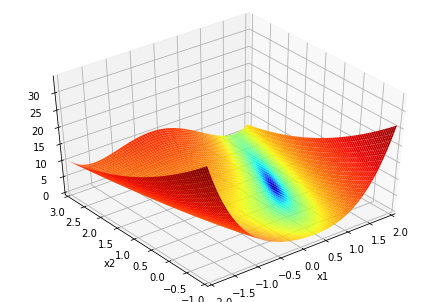

In [7]:

from mpl_toolkits.mplot3d import Axes3D
fig = pt.figure()
ax = Axes3D(fig, azim=-128, elev=43)
s = .05
X = np.arange(-2, 2.+s, s)
Y = np.arange(-1, 3.+s, s)
xmesh, ymesh = np.meshgrid(X, Y)
fmesh = f1(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh, rstride=1, cstride=1, norm=LogNorm(),
                linewidth=0, edgecolor='none', cmap="jet")

# Set the axis limits so that they are the same as in the figure above.
ax.set_xlim([-2, 2.0])                                                       
ax.set_ylim([-1, 3.0])                                                       

pt.xlabel("x1")
pt.ylabel("x2")
pt.savefig("Rosenbrock function.svg", bbox_inches="tight")

pt.show()


Text(0, 0.5, 'x2')

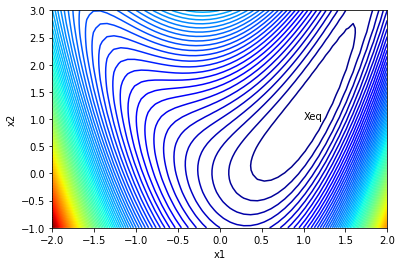

In [8]:

xmesh, ymesh = np.mgrid[-2:2:50j,-1:3:50j]
fmesh = f1(np.array([xmesh, ymesh]))
pt.axis("auto")
pt.contour(xmesh, ymesh, fmesh,100,cmap='jet')
array = [np.array([1, 1])]
pt.annotate('Xeq', (array[0][0],array[0][1]))
pt.xlabel("x1")
pt.ylabel("x2")

# Plots for $f_{2}(x_{1},x_{2})$

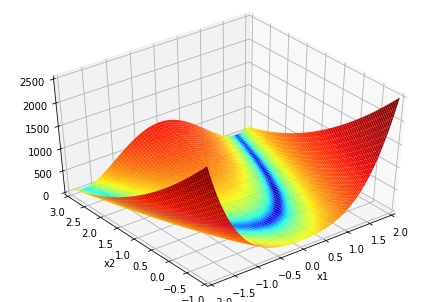

In [ ]:
# fig = pt.figure()
# ax = fig.gca(projection="3d")

# xmesh, ymesh = np.mgrid[-6:6:50j,-6:6:50j]
# fmesh = f2(np.array([xmesh, ymesh]))
# ax.plot_surface(xmesh, ymesh, fmesh)
# fig.suptitle('Surface Plot of f_2', fontsize=20)
from mpl_toolkits.mplot3d import Axes3D
fig = pt.figure()
ax = Axes3D(fig, azim=-128, elev=43)
s = .05
X = np.arange(-2, 2.+s, s)
Y = np.arange(-1, 3.+s, s)
xmesh, ymesh = np.meshgrid(X, Y)
fmesh = f2(np.array([xmesh, ymesh]))
# ax.plot_surface(X, Y, Z, rstride=1, cstride=1, norm = LogNorm(),
#                 cmap="viridis")
# Without using `` linewidth=0, edgecolor='none' '', the code may produce a
# graph with wide black edges, which will make the surface look much darker
# than the one illustrated in the figure above.
ax.plot_surface(xmesh, ymesh, fmesh, rstride=1, cstride=1, norm=LogNorm(),
                linewidth=0, edgecolor='none', cmap="jet")

# Set the axis limits so that they are the same as in the figure above.
ax.set_xlim([-2, 2.0])                                                       
ax.set_ylim([-1, 3.0])                                                       


pt.xlabel("x1")
pt.ylabel("x2")
pt.savefig("Rosenbrock function.svg", bbox_inches="tight")

pt.show()

Text(0, 0.5, 'x2')

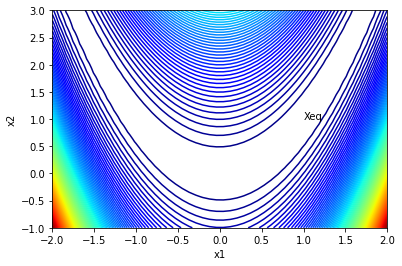

In [ ]:

xmesh, ymesh = np.mgrid[-2:2:50j,-1:3:50j]
fmesh = f2(np.array([xmesh, ymesh]))
pt.axis("auto")
pt.contour(xmesh, ymesh, fmesh,100,cmap='jet')
array = [np.array([1, 1])]
pt.annotate('Xeq', (array[0][0],array[0][1]))
pt.xlabel("x1")
pt.ylabel("x2")

# 1. Steepest Gradient Descent Algorithm 


In [6]:
def Steepest_Descent( guesses, alpha,f,df,g_of_alpha,interval_a, interval_b,method = 2, Q = 0, b = 0, episolon = 0.001 ):
    i = 0
    x = guesses[0]
    grad = -df(x)
    while (LA.norm(grad) > episolon).any():
      if i > 100000000:
          break;
      if method == 1: #optimize_alpha:
          # if the function we are interested in is Quadratic we can use Q and b 
          # pass the derivative of the quadratic function with parameters x,Q,b
          grad = -df(x,Q,b)
          alpha_opt = np.dot(np.transpose(grad),grad)/np.dot(np.dot(np.transpose(grad),Q),grad)
          next_guess = x + alpha_opt * grad
      elif method == 2:
          # Golden_section_method
          grad = -df(x)
          alpha_opt = Golden_section_method(interval_a, interval_b, x,grad,f,g_of_alpha)
          next_guess = x + alpha_opt * grad
      elif method == 3:
          # Variable Step Size 
          grad = -df(x)
          G = []
          for j in range(len(alpha)):
              G.append(g_of_alpha(f,x,grad,alpha[j]))
          index_min = np.argmin(G)
          alpha_opt = alpha[index_min]
          next_guess = x + alpha_opt * grad

      elif method == 4:
          # Quadratic fit
          grad = -df(x)
          alpha_tuple = np.random.uniform(10**-5,1.24*10**-4,3);
          vandermont_matrix = np.vander(alpha_tuple, len(alpha_tuple))
          G = []
          for j in range(len(alpha_tuple)):
              G.append(g_of_alpha(f,x,grad,alpha_tuple[j]))
          [a,b,c] = np.dot(inv(vandermont_matrix),np.transpose(G))
          
          # if np.all([a>0,b<0]) :
          alpha_opt = -(b/(2*a))
          # else: 
            # alpha_tuple = np.random.uniform(1.01*10**-4,1.21*10**-4,3);
            # alpha_opt = alpha_tuple[0]
          next_guess = x + alpha_opt * grad
          
      elif method == 5:
          # Fixed Step Size 
          grad = -df(x)
          next_guess = x + alpha[0] * grad
      x = next_guess
      guesses.append(next_guess)
      i+=1
    return guesses, i

# the function g of alpha used for golden section methods
def g_of_alpha(f,x,grad,alpha):
    return f(x + alpha*grad);

    
def Golden_section_method(interval_a, interval_b, x,grad,f,g):
  K = 0 
  a1,a2 = [0,0]
  a, b= [interval_a,interval_b]
  while b-a >= 0.001 :
    # alpha 1 and alpha 2
    a1 = a + 0.382*(b-a);
    a2 = a + 0.618*(b-a);
    # print("Iteration: "+str(K) +" a: "+ str(a) + " b: "+ str(b) + " b-a: " +str(b-a))
    # Region Elimination Logic
    if g(f,x,grad,a1) > g(f,x,grad,a2):
      a = a1;
    elif g(f,x,grad,a1) < g(f,x,grad,a2):
      b = a2;
    elif g(f,x,grad,a1) == g(f,x,grad,a2):
      a = a1;
      b = a2;
    K+=1
  return a

## Results for $f_{1}(x_{1},x_{2})$ 

##### Initial Conditions  For $f_{1}$: $\epsilon$ = $10^{-3}$ $: \alpha = 10^{-4}$ $: x_{0} = \big(\begin{smallmatrix}
  2 \\
  2 
\end{smallmatrix}\big)$

 

Num of iterations: 16
Min of the function is at:(1.0006515508266525, 1.0010007310149072)


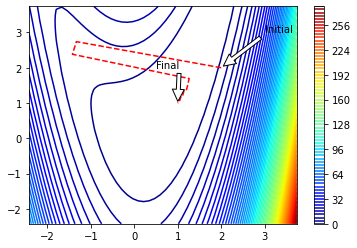

In [ ]:
xmesh, ymesh = np.mgrid[-2:3:50j,-2:6:50j]
fmesh = f1(np.array([xmesh, ymesh]))
guesses = [np.array([2, 2])]
guesses, i = Steepest_Descent( guesses, alpha,f1,df1,g_of_alpha,interval_a, interval_b )
print("Num of iterations: " + str(i)) 
xmesh, ymesh = np.mgrid[np.min(guesses)-1:np.max(guesses)+1:50j,np.min(guesses)-1:np.max(guesses)+1:50j]
fmesh = f1(np.array([xmesh, ymesh]))
pt.axis("auto")
pt.contour(xmesh, ymesh, fmesh, int(100*np.max(guesses)/3),cmap='jet')
array = np.array(guesses)
pt.plot(array.T[0], array.T[1], "r--")
pt.annotate('Initial', (array[0][0],array[0][1]), xytext=(3,3),
            arrowprops=dict(facecolor='white', shrink=0.05),
            )
pt.annotate('Final', (array[len(array)-1][0],array[len(array)-1][1]), xytext=(.5,2),
            arrowprops=dict(facecolor='white', shrink=0.05),
            )
pt.colorbar()
print("Min of the function is at:" + str((array[len(array)-1][0],array[len(array)-1][1]))) 




##### Initial Conditions  For $f_{1}$: $\epsilon$ = $10^{-3}$ $: \alpha = 10^{-4}$$: x_{0} = \big(\begin{smallmatrix}
  5 \\
  5 
\end{smallmatrix}\big)$

 

Num of iterations: 38
Min of the function is at:(1.0005333218632506, 1.0009058071153962)


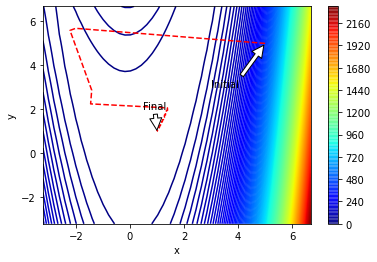

In [ ]:
fmesh = f1(np.array([xmesh, ymesh]))
guesses = [np.array([5, 5])]
guesses, i = Steepest_Descent( guesses, alpha,f1,df1,g_of_alpha,interval_a, interval_b )
print("Num of iterations: " + str(i)) 
xmesh, ymesh = np.mgrid[np.min(guesses)-1:np.max(guesses)+1:50j,np.min(guesses)-1:np.max(guesses)+1:50j]
# xmesh, ymesh = np.mgrid[-1:5:50j,-1:6:50j]
fmesh = f1(np.array([xmesh, ymesh]))
pt.axis("auto")
pt.contour(xmesh, ymesh, fmesh, int(100*np.max(guesses)/3),cmap='jet')
array = np.array(guesses)
pt.plot(array.T[0], array.T[1], "r--")
pt.annotate('Initial', (array[0][0],array[0][1]), xytext=(3,3),
            arrowprops=dict(facecolor='white', shrink=0.05),
            )
pt.annotate('Final', (array[len(array)-1][0],array[len(array)-1][1]), xytext=(.5,2),
            arrowprops=dict(facecolor='white', shrink=0.05),
            )
pt.colorbar()
pt.xlabel("x")
pt.ylabel("y")
print("Min of the function is at:" + str((array[len(array)-1][0],array[len(array)-1][1]))) 



## Results for $f_{2}(x_{1},x_{2})$ 

##### Initial Conditions For $f_{2}$ $\epsilon$ = $10^{-3}$ $: \alpha = 10^{-4}$ $: x_{0} = \big(\begin{smallmatrix}
  2 \\
  2 
\end{smallmatrix}\big)$

 

Num of iterations: 7340
Min of the function is at:(0.9989331497415209, 0.9978821762366469)


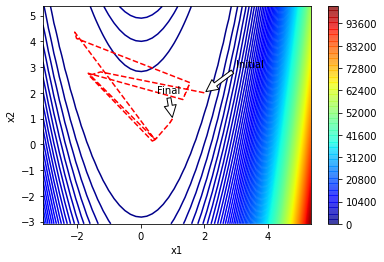

In [ ]:
xmesh, ymesh = np.mgrid[np.min(guesses):np.max(guesses):50j,np.min(guesses):np.max(guesses):50j]
fmesh = f2(np.array([xmesh, ymesh]))
guesses = [np.array([2, 2])]
guesses, i = Steepest_Descent( guesses, alpha,f2,df2,g_of_alpha,interval_a, interval_b )
print("Num of iterations: " + str(i)) 
xmesh, ymesh = np.mgrid[np.min(guesses)-1:np.max(guesses)+1:50j,np.min(guesses)-1:np.max(guesses)+1:50j]
fmesh = f2(np.array([xmesh, ymesh]))
pt.axis("auto")
pt.contour(xmesh, ymesh, fmesh, int(100*np.max(guesses)/3),cmap='jet')
array = np.array(guesses)
pt.plot(array.T[0], array.T[1], "r--")
pt.annotate('Initial', (array[0][0],array[0][1]), xytext=(3,3),
            arrowprops=dict(facecolor='white', shrink=0.05),
            )
pt.annotate('Final', (array[len(array)-1][0],array[len(array)-1][1]), xytext=(.5,2),
            arrowprops=dict(facecolor='white', shrink=0.05),
            )
pt.colorbar()
pt.xlabel("x1")
pt.ylabel("x2")
print("Min of the function is at:" + str((array[len(array)-1][0],array[len(array)-1][1]))) 



##### Initial Conditions For $f_{2}$ $\epsilon$ = $10^{-3}$ $: \alpha = 10^{-4}$ $: x_{0} = \big(\begin{smallmatrix}
  5 \\
  5 
\end{smallmatrix}\big)$

 

Num of iterations: 8529
Min of the function is at:(1.0010614486804301, 1.0021489037989222)


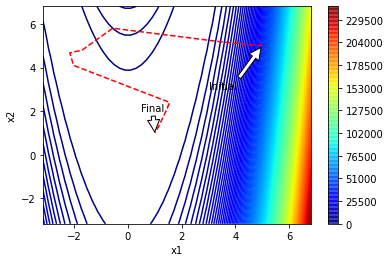

In [ ]:
xmesh, ymesh = np.mgrid[np.min(guesses):np.max(guesses):50j,np.min(guesses):np.max(guesses):50j]
fmesh = f2(np.array([xmesh, ymesh]))
guesses = [np.array([5, 5])]
guesses, i = Steepest_Descent( guesses, alpha,f2,df2,g_of_alpha,interval_a, interval_b)
print("Num of iterations: " + str(i)) 
xmesh, ymesh = np.mgrid[np.min(guesses)-1:np.max(guesses)+1:50j,np.min(guesses)-1:np.max(guesses)+1:50j]
fmesh = f2(np.array([xmesh, ymesh]))
pt.axis("auto")
pt.contour(xmesh, ymesh, fmesh, int(100*np.max(guesses)/3),cmap='jet')
array = np.array(guesses)
pt.plot(array.T[0], array.T[1], "r--")
pt.annotate('Initial', (array[0][0],array[0][1]), xytext=(3,3),
            arrowprops=dict(facecolor='white', shrink=0.05),
            )
pt.annotate('Final', (array[len(array)-1][0],array[len(array)-1][1]), xytext=(.5,2),
            arrowprops=dict(facecolor='white', shrink=0.05),
            )
pt.colorbar()
pt.xlabel("x1")
pt.ylabel("x2")
print("Min of the function is at:" + str((array[len(array)-1][0],array[len(array)-1][1]))) 





# 2. The Newton-Raphson Method 


In [ ]:
def Newton_Raphson( guesses,df,inv_Hessian, episolon = 0.001 ):
    i = 0
    x = guesses[0]
    grad = df(x)
    while (LA.norm(grad) > episolon).any():
        grad = df(x)
        next_guess = x - np.dot(grad,inv_Hessian(x))
        x = next_guess
        guesses.append(next_guess)
        i+=1
    return guesses, i

In [ ]:
def BB_Quasi_Newton( guesses,df,alpha, episolon = 0.001 ):
    i = 0
    x = guesses[0]
    grad = df(x)
    while (LA.norm(grad) > episolon).any():
        grad = df(x)
        next_guess = x - alpha*grad
        s = next_guess - x; 
        y = df(next_guess) - df(x);
        alpha = np.dot(np.transpose(s),s)/np.dot(np.transpose(s),y)
        alpha = np.dot(np.transpose(s),y)/np.dot(np.transpose(y),y)
        x = next_guess
        guesses.append(next_guess)
        i+=1
    return guesses, i

## Results for $f_{1}(x_{1},x_{2})$ 

##### Initial Conditions  For $f_{1}$: $\epsilon$ = $10^{-4}$ $: x_{0} = \big(\begin{smallmatrix}
  2 \\
  2 
\end{smallmatrix}\big)$

 

Num of iterations: 16
Min of the function is at:(0.9993754172737654, 1.0002582403016071)


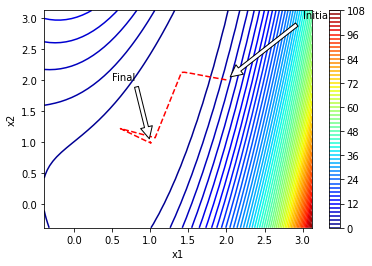

In [ ]:
xmesh, ymesh = np.mgrid[-2:3:50j,-2:6:50j]
fmesh = f1(np.array([xmesh, ymesh]))
guesses = [np.array([2, 2])]
np.dot(np.transpose(df1(guesses[0])),inv_Hessian1(guesses[0]))
Q= 0
#guesses, i = BB_Quasi_Newton( guesses,df1,0.01, episolon = 0.001 )
guesses, i = Newton_Raphson( guesses,df1,inv_Hessian1, episolon = 0.001 )
print("Num of iterations: " + str(i)) 
xmesh, ymesh = np.mgrid[np.min(guesses)-1:np.max(guesses)+1:50j,np.min(guesses)-1:np.max(guesses)+1:50j]
fmesh = f1(np.array([xmesh, ymesh]))
pt.axis("auto")
pt.contour(xmesh, ymesh, fmesh, int(100*np.max(guesses)/3),cmap='jet')
array = np.array(guesses)
pt.plot(array.T[0], array.T[1], "r--")
pt.annotate('Initial', (array[0][0],array[0][1]), xytext=(3,3),
            arrowprops=dict(facecolor='white', shrink=0.05),
            )
pt.annotate('Final', (array[len(array)-1][0],array[len(array)-1][1]), xytext=(.5,2),
            arrowprops=dict(facecolor='white', shrink=0.05),
            )
pt.colorbar()
pt.xlabel("x1")
pt.ylabel("x2")
print("Min of the function is at:" + str((array[len(array)-1][0],array[len(array)-1][1]))) 


##### Initial Conditions For $f_{1}$ $: \epsilon$ = $10^{-4}$  $: x_{0} = \big(\begin{smallmatrix}
  5 \\
  5 
\end{smallmatrix}\big)$

 

Num of iterations: 35
Min of the function is at:(0.9991340473145481, 0.9979115880120483)


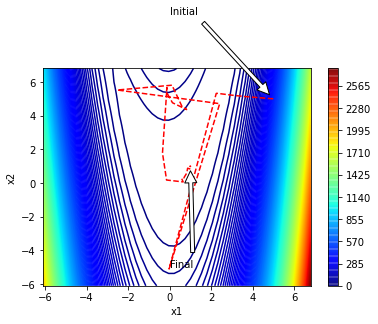

In [ ]:
xmesh, ymesh = np.mgrid[-6:6:50j,-15:30:50j]
fmesh = f1(np.array([xmesh, ymesh]))
guesses = [np.array([5, 5])]
#guesses, i = BB_Quasi_Newton( guesses,df1,0.0001, episolon = 0.001 )
guesses, i = Newton_Raphson( guesses,df1,inv_Hessian1, episolon = 0.001 )
print("Num of iterations: " + str(i)) 
xmesh, ymesh = np.mgrid[np.min(guesses)-1:np.max(guesses)+1:50j,np.min(guesses)-1:np.max(guesses)+1:50j]
fmesh = f1(np.array([xmesh, ymesh]))
pt.axis("auto")
pt.contour(xmesh, ymesh, fmesh, int(100*np.max(guesses)/3),cmap='jet')
array = np.array(guesses)
pt.plot(array.T[0], array.T[1], "r--")
pt.annotate('Initial', (array[0][0],array[0][1]), xytext=(0,10),
            arrowprops=dict(facecolor='white', shrink=0.05),
            )
pt.annotate('Final', (array[len(array)-1][0],array[len(array)-1][1]), xytext=(0,-5),
            arrowprops=dict(facecolor='white', shrink=0.05),
            )
pt.colorbar()
pt.xlabel("x1")
pt.ylabel("x2")
print("Min of the function is at:" + str((array[len(array)-1][0],array[len(array)-1][1]))) 


## Results for $f_{2}(x_{1},x_{2})$ 

##### Initial Conditions  For $f_{2}$: $\epsilon$ = $10^{-4}$ $: x_{0} = \big(\begin{smallmatrix}
  2 \\
  2 
\end{smallmatrix}\big)$

 

Num of iterations: 35
Min of the function is at:(0.999680017708108, 0.9993588502188278)


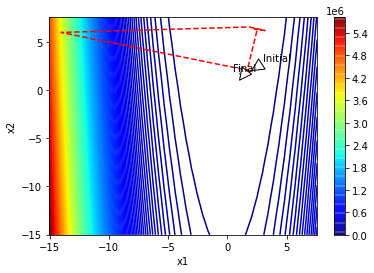

In [ ]:
xmesh, ymesh = np.mgrid[-6:6:50j,-15:30:50j]
fmesh = f2(np.array([xmesh, ymesh]))
guesses = [np.array([2, 2])]
# guesses, i = BB_Quasi_Newton( guesses,df2,0.01, episolon = 0.001 )
guesses, i = Newton_Raphson( guesses,dfk,inv_Hessiank, episolon = 0.001 )
print("Num of iterations: " + str(i)) 
xmesh, ymesh = np.mgrid[np.min(guesses)-1:np.max(guesses)+1:50j,np.min(guesses)-1:np.max(guesses)+1:50j]
fmesh = f2(np.array([xmesh, ymesh]))
pt.axis("auto")
pt.contour(xmesh, ymesh, fmesh, int(100*np.max(guesses)/3),cmap='jet')
array = np.array(guesses)
pt.plot(array.T[0], array.T[1], "r--")
pt.annotate('Initial', (array[0][0],array[0][1]), xytext=(3,3),
            arrowprops=dict(facecolor='white', shrink=0.05),
            )
pt.annotate('Final', (array[len(array)-1][0],array[len(array)-1][1]), xytext=(.5,2),
            arrowprops=dict(facecolor='white', shrink=0.05),
            )
pt.colorbar()
pt.xlabel("x1")
pt.ylabel("x2")
print("Min of the function is at:" + str((array[len(array)-1][0],array[len(array)-1][1]))) 


##### Initial Conditions  For $f_{2}$: $\epsilon$ = $10^{-3}$ $: x_{0} = \big(\begin{smallmatrix}
  5 \\
  5 
\end{smallmatrix}\big)$

 

Locator attempting to generate 1653 ticks ([0.0, ..., 1652.0]), which exceeds Locator.MAXTICKS (1000).


Num of iterations: 64
Min of the function is at:(1.0001447522118674, 1.000290104566722)


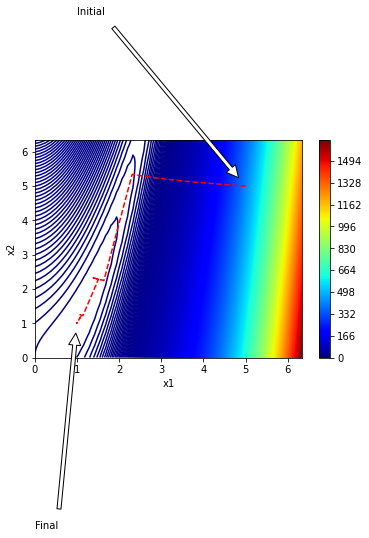

In [ ]:
xmesh, ymesh = np.mgrid[-6:6:50j,-15:30:50j]
fmesh = fk(np.array([xmesh, ymesh]))
guesses = [np.array([5, 5])]
# guesses, i = BB_Quasi_Newton( guesses,dfk,0.000001, episolon = 0.001 )
guesses, i = Newton_Raphson( guesses,df2,inv_Hessian2, episolon = 0.001 )
print("Num of iterations: " + str(i)) 
xmesh, ymesh = np.mgrid[np.min(guesses)-1:np.max(guesses)+1:50j,np.min(guesses)-1:np.max(guesses)+1:50j]
fmesh = f1(np.array([xmesh, ymesh]))
pt.axis("auto")
pt.contour(xmesh, ymesh, fmesh, int(1000*np.max(guesses)/3),cmap='jet')
array = np.array(guesses)
pt.plot(array.T[0], array.T[1], "r--")
pt.annotate('Initial', (array[0][0],array[0][1]), xytext=(1,10),
            arrowprops=dict(facecolor='white', shrink=0.05),
            )
pt.annotate('Final', (array[len(array)-1][0],array[len(array)-1][1]), xytext=(0,-5),
            arrowprops=dict(facecolor='white', shrink=0.05),
            )
pt.colorbar()
pt.xlabel("x1")
pt.ylabel("x2")
print("Min of the function is at:" + str((array[len(array)-1][0],array[len(array)-1][1]))) 


## 3. The Conjugate Gradient Method


In [ ]:
def Conjugate_Gradient( guesses,alpha,f,df,g_of_alpha,interval_a, interval_b, Hessian, method = 1, episolon = 0.001 ):
    x = guesses[0]
    grad = df(x)
    d = -grad
    i = 0
    while (LA.norm(grad) > episolon).any():
        if i > 10000000:
            break;
        if (method == 1):
          # if we can easily get the inverse of the Hessian
            Q = Hessian(x)  
            alpha_opt = np.dot(np.transpose(grad),d)/np.dot(np.dot(np.transpose(d),Q),d)
            next_guess = x - alpha_opt * d
            next_grad = df(next_guess)
            beta = np.dot(np.transpose(next_grad),next_grad)/np.dot(np.transpose(grad),grad)
            next_d = -next_grad - beta*d
            grad = next_grad
            x = next_guess
            d = next_d
            guesses.append(next_guess)
        elif (method == 2):
          # if using a fixed step size
            next_guess = x + alpha[0]* d
            next_grad = df(next_guess)
            beta = LA.norm(next_grad)**2/LA.norm(grad)**2
            next_d = -next_grad + beta*d
            grad = next_grad
            x = next_guess
            d = next_d
            guesses.append(next_guess)
        elif method == 3:
          # Golden_section_method
            alpha_opt = Golden_section_method(interval_a, interval_b, x,grad,f,g_of_alpha)
            next_guess = x - alpha_opt * d
            next_grad = df(next_guess)
            beta = np.dot(np.transpose(next_grad),next_grad)/np.dot(np.transpose(grad),grad)
            next_d = -next_grad - beta*d
            grad = next_grad
            x = next_guess
            d = next_d
            guesses.append(next_guess)
        i+=1
    return guesses, i

## Results for $f_{1}(x_{1},x_{2})$ 

##### Initial Conditions  For $f_{1}$: $\epsilon$ = $10^{-3}$ $: \alpha = 10^{-4}$ $: x_{0} = \big(\begin{smallmatrix}
  2 \\
  2 
\end{smallmatrix}\big)$

 

In [ ]:
xmesh, ymesh = np.mgrid[-2:3:50j,-2:6:50j]
fmesh = f1(np.array([xmesh, ymesh]))
guesses = [np.array([2, 2])]
interval_a, interval_b = [0.001,1]
guesses, i = Conjugate_Gradient( guesses,alpha,f1,df1,g_of_alpha,interval_a, interval_b, Hessian1, method = 2, episolon = 0.001 )
print("Num of iterations: " + str(i))
xmesh, ymesh = np.mgrid[np.min(guesses)-1:np.max(guesses)+1:50j,np.min(guesses)-1:np.max(guesses)+1:50j]
fmesh = f1(np.array([xmesh, ymesh])) 
pt.axis("auto")
pt.contour(xmesh, ymesh, fmesh, int(100*np.max(guesses)/3),cmap='jet')
array = np.array(guesses)
pt.plot(array.T[0], array.T[1], "r--")
pt.annotate('Initial', (array[0][0],array[0][1]), xytext=(3,3),
            arrowprops=dict(facecolor='white', shrink=0.05),
            )
pt.annotate('Final', (array[len(array)-1][0],array[len(array)-1][1]), xytext=(.5,2),
            arrowprops=dict(facecolor='white', shrink=0.05),
            )
pt.colorbar()
pt.xlabel("x1")
pt.ylabel("x2")
print("Min of the function is at:" + str((array[len(array)-1][0],array[len(array)-1][1]))) 


##### Initial Conditions  For $f_{1}$: $\epsilon$ = $10^{-3}$ $: \alpha = 10^{-4}$ $: x_{0} = \big(\begin{smallmatrix}
  5 \\
  5 
\end{smallmatrix}\big)$

 

In [ ]:
xmesh, ymesh = np.mgrid[-6:6:50j,-15:30:50j]
fmesh = f1(np.array([xmesh, ymesh]))
guesses = [np.array([5, 5])]
interval_a, interval_b = [0.001,1]
guesses, i = Conjugate_Gradient( guesses,alpha,f1,df1,g_of_alpha,interval_a, interval_b, Hessian1, method = 2, episolon = 0.001 )
print("Num of iterations: " + str(i)) 
xmesh, ymesh = np.mgrid[np.min(guesses)-1:np.max(guesses)+1:50j,np.min(guesses)-1:np.max(guesses)+1:50j]
fmesh = f1(np.array([xmesh, ymesh]))
pt.axis("auto")
pt.contour(xmesh, ymesh, fmesh, int(100*np.max(guesses)/3),cmap='jet')
array = np.array(guesses)
pt.plot(array.T[0], array.T[1], "r--")
pt.annotate('Initial', (array[0][0],array[0][1]), xytext=(3,3),
            arrowprops=dict(facecolor='white', shrink=0.05),
            )
pt.annotate('Final', (array[len(array)-1][0],array[len(array)-1][1]), xytext=(.5,2),
            arrowprops=dict(facecolor='white', shrink=0.05),
            )
pt.colorbar()
pt.xlabel("x1")
pt.ylabel("x2")
print("Min of the function is at:" + str((array[len(array)-1][0],array[len(array)-1][1]))) 


## Results for $f_{2}(x_{1},x_{2})$ 

##### Initial Conditions  For $f_{2}$: $\epsilon$ = $10^{-3}$ $: \alpha = 10^{-4}$ $: x_{0} = \big(\begin{smallmatrix}
  2 \\
  2 
\end{smallmatrix}\big)$

 

In [ ]:
fmesh = f2(np.array([xmesh, ymesh]))
guesses = [np.array([2, 2])]
interval_a, interval_b = [0.0001,1]
guesses, i = Conjugate_Gradient( guesses,alpha,f2,df2,g_of_alpha,interval_a, interval_b, Hessian2, method = 2, episolon = 0.001 )
print("Num of iterations: " + str(i)) 
xmesh, ymesh = np.mgrid[np.min(guesses)-1:np.max(guesses)+1:50j,np.min(guesses)-1:np.max(guesses)+1:50j]
fmesh = f2(np.array([xmesh, ymesh]))
pt.axis("auto")
pt.contour(xmesh, ymesh, fmesh, int(100*np.max(guesses)/3),cmap='jet')
array = np.array(guesses)
pt.plot(array.T[0], array.T[1], "r--")
pt.annotate('Initial', (array[0][0],array[0][1]), xytext=(3,3),
            arrowprops=dict(facecolor='white', shrink=0.05),
            )
pt.annotate('Final', (array[len(array)-1][0],array[len(array)-1][1]), xytext=(.5,2),
            arrowprops=dict(facecolor='white', shrink=0.05),
            )
pt.colorbar()
pt.xlabel("x1")
pt.ylabel("x2")
print("Min of the function is at:" + str((array[len(array)-1][0],array[len(array)-1][1]))) 


##### Initial Conditions  For $f_{2}$: $\epsilon$ = $10^{-3}$ $: \alpha = 10^{-4}$ $: x_{0} = \big(\begin{smallmatrix}
  5 \\
  5 
\end{smallmatrix}\big)$

 

In [ ]:
fmesh = f2(np.array([xmesh, ymesh]))
guesses = [np.array([5, 5])]
interval_a, interval_b = [0.00001,0.1]
guesses, i = Conjugate_Gradient( guesses,alpha,f2,df2,g_of_alpha,interval_a, interval_b, Hessian2, method = 2, episolon = 0.001 )
print("Num of iterations: " + str(i)) 
xmesh, ymesh = np.mgrid[np.min(guesses)-1:np.max(guesses)+1:50j,np.min(guesses)-1:np.max(guesses)+1:50j]
fmesh = f2(np.array([xmesh, ymesh]))
pt.axis("auto")
pt.contour(xmesh, ymesh, fmesh, int(100*np.max(guesses)/3),cmap='jet')
array = np.array(guesses)
pt.plot(array.T[0], array.T[1], "r--")
pt.annotate('Initial', (array[0][0],array[0][1]), xytext=(3,3),
            arrowprops=dict(facecolor='white', shrink=0.05),
            )
pt.annotate('Final', (array[len(array)-1][0],array[len(array)-1][1]), xytext=(.5,2),
            arrowprops=dict(facecolor='white', shrink=0.05),
            )
pt.colorbar()
pt.xlabel("x1")
pt.ylabel("x2")
print("Min of the function is at:" + str((array[len(array)-1][0],array[len(array)-1][1]))) 


NameError: ignored